In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util

# Testing Tree Path Covers

In [2]:
def draw_path_cover(tree, layout):
    path = util.path_cover(tree)
    nx.draw_networkx_nodes(tree, pos=layout, node_size=40)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8)
    nx.draw_networkx_edges(nx.DiGraph(tree), pos=layout, edgelist=path, edge_color="tab:red", arrows=True)
    #nx.draw_networkx_edges(tree, pos=layout, edgelist=[x for x in tree.edges() if x not in path])

### Random tree with edge weights in [0,1)

In [3]:
n = 25
tree = nx.random_labeled_tree(n)
tree = nx.bfs_tree(tree, 0)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

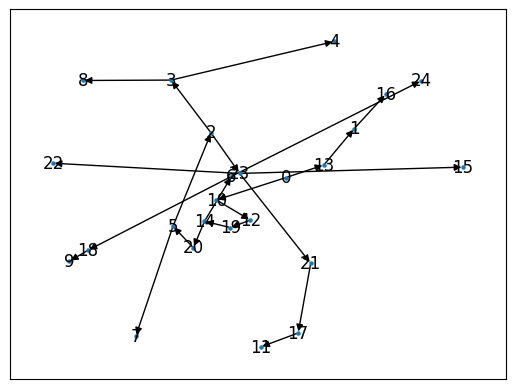

In [4]:
layout = nx.spring_layout(tree, seed=1)
nx.draw_networkx(tree, pos=layout, node_size=5)

0: (8.912854790927035, 0, 13, 10)
13: (0.8243647972890835, 0.999793328241155, 1, None)
10: (6.7623580908309195, 0.32633857456587767, 12, None)
1: (0.2699389287941336, 0.5544258684949499, 16, None)
12: (6.599281314664503, 0.16307677616641647, 19, None)
16: (0, 0.2699389287941336, None, None)
19: (5.851052865052209, 0.7482284496122945, 14, None)
14: (5.181197180958821, 0.6698556840933874, 20, 6)
20: (2.5297672967235703, 0.6260339911838557, 5, None)
6: (2.025395893051396, -0.19475128796309393, 18, 24)
5: (2.5297672967235703, -0.01421639010417719, 7, 2)
18: (0.8764845275917191, 0.7249123617321067, 9, None)
24: (0, 0.4239990037275698, None, None)
7: (0, 0.29342796867668086, None, None)
2: (1.9944977854916088, 0.24184154255528068, 23, 3)
9: (0, 0.8764845275917191, None, None)
3: (0.6045085200418844, 0.16053301680468235, 8, 4)
23: (0.8794356494645541, 0.3500205991804881, 22, 15)
4: (0, 0.11802769863377305, None, None)
8: (0, 0.48648082140811133, None, None)
15: (0, 0.2088809661785367, None, N

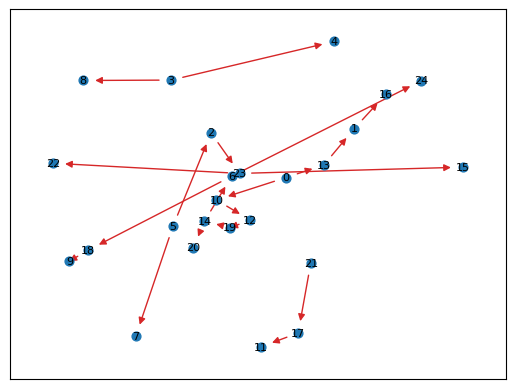

In [5]:
draw_path_cover(tree, layout)

In [6]:
nx.get_edge_attributes(tree, 'weight')

{(0, 13): 0.999793328241155,
 (0, 10): 0.32633857456587767,
 (13, 1): 0.5544258684949499,
 (10, 12): 0.16307677616641647,
 (1, 16): 0.2699389287941336,
 (12, 19): 0.7482284496122945,
 (19, 14): 0.6698556840933874,
 (14, 20): 0.6260339911838557,
 (14, 6): 0.2292477157644759,
 (20, 5): 0.22762515245110349,
 (6, 18): 0.7249123617321067,
 (6, 24): 0.4239990037275698,
 (5, 7): 0.29342796867668086,
 (5, 2): 0.402374559359963,
 (18, 9): 0.8764845275917191,
 (2, 3): 0.2785607154384554,
 (2, 23): 0.5589015653590248,
 (3, 4): 0.11802769863377305,
 (3, 8): 0.48648082140811133,
 (23, 15): 0.2088809661785367,
 (23, 21): 0.09769241818113361,
 (23, 22): 0.33254607508809586,
 (21, 17): 0.22279482504379688,
 (17, 11): 0.11521378315412467}

### Unit edge weights

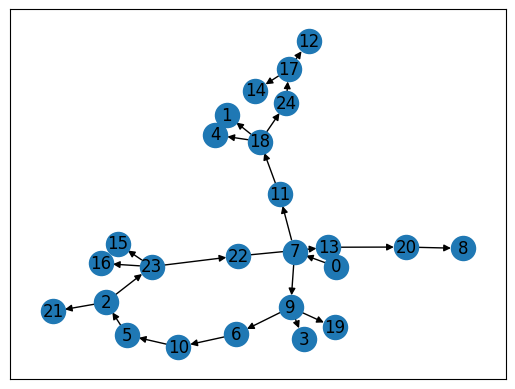

In [7]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

ones_layout = nx.spring_layout(ones_tree)
nx.draw_networkx(nx.bfs_tree(ones_tree, 0), pos=ones_layout)

0: (17, 0, 7, None)
7: (16, 1, 11, 9)
9: (11, 0, 19, 3)
11: (4, 1, 18, None)
3: (0, 1, None, None)
19: (0, 1, None, None)
6: (9, 1, 10, None)
18: (4, 0, 4, 1)
10: (8, 1, 5, None)
1: (0, 1, None, None)
4: (0, 1, None, None)
24: (2, 1, 17, None)
5: (7, 1, 2, None)
17: (2, 0, 14, 12)
2: (6, 1, 21, 23)
12: (0, 1, None, None)
14: (0, 1, None, None)
21: (0, 1, None, None)
23: (5, 0, 16, 15)
15: (0, 1, None, None)
16: (0, 1, None, None)
22: (3, 1, 13, None)
13: (2, 1, 20, None)
20: (1, 1, 8, None)
8: (0, 1, None, None)
Path edges: [(0, 7), (7, 11), (9, 19), (9, 3), (6, 10), (18, 4), (18, 1), (10, 5), (5, 2), (17, 14), (17, 12), (2, 21), (2, 23), (23, 16), (23, 15), (22, 13), (13, 20), (20, 8)]
Total path length (x(root)): 17
Total path length (actual): 18
Difference: 1


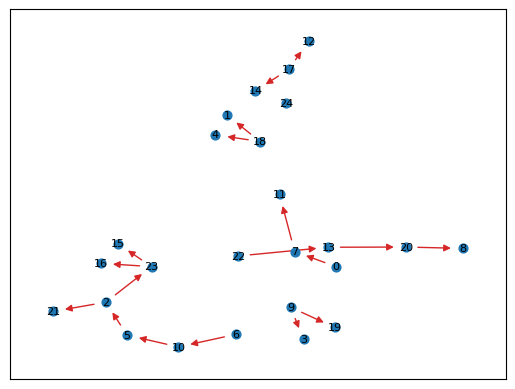

In [8]:
draw_path_cover(ones_tree, ones_layout)

In [9]:
util.path_cover_two(ones_tree)

{3: 0,
 19: 0,
 1: 0,
 4: 0,
 12: 0,
 14: 0,
 21: 0,
 15: 0,
 16: 0,
 8: 0,
 20: 1,
 13: 2,
 22: 3,
 23: 5,
 2: 6,
 17: 2,
 5: 7,
 24: 2,
 10: 8,
 18: 4,
 6: 9,
 11: 4,
 9: 11,
 7: 16,
 0: 17}